In [48]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns 
import matplotlib.pyplot as plt
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv" 
train = pd.read_csv(train_url) 
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv" 
test = pd.read_csv(test_url) 

In [49]:
print("***** Train_Set *****") 
print(train.head()) 
print("\n") 
print("***** Test_Set *****") 
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [50]:
print("***** Train_Set *****") 
print(train.describe()) 

print(train.columns.values) 
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'  
 'Ticket' 'Fare' 'Cabin' 'Embarked']

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibS

['PassengerIdSurvivedPclassNameSexAgeSibSpParchTicketFareCabinEmbarked']

In [51]:
# For the train set 
train.isna().head()  
# For the test set 
test.isna().head() 

print("*****In the train set*****") 
print(train.isna().sum()) 
print("\n") 
print("*****In the test set*****") 
print(test.isna().sum()) 

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [52]:
# Fill missing values with mean column values in the train set  
train.fillna(train.mean(), inplace=True) 
# Fill missing values with mean column values in the test set  
test.fillna(test.mean(), inplace=True)

print(train.isna().sum()) 

train[['Pclass', 'Survived']].groupby(['Pclass'], 
as_index=False).mean().sort_values(by='Survived', ascending=False) 

train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', 
ascending=False) 

train[["SibSp", "Survived"]].groupby(['SibSp'],  as_index=False).mean().sort_values(by='Survived', 
ascending=False)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\Hugo\AppData\Local\Temp/ipykernel_15672/3066235466.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace=True)
C:\Users\Hugo\AppData\Local\Temp/ipykernel_15672/3066235466.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(), inplace=True)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


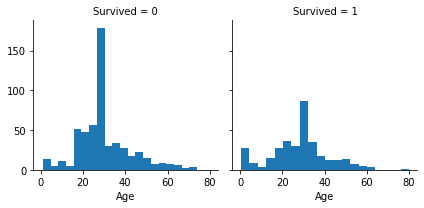

In [53]:
g = sns.FacetGrid(train, col='Survived') 
g.map(plt.hist, 'Age', bins=20) 

c:\Users\Hugo\Development\Skola\TNM108\venv_tnm108\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


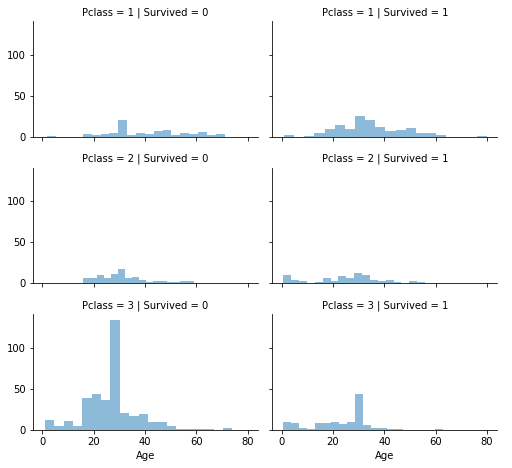

In [54]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)  
grid.map(plt.hist, 'Age', alpha=.5, bins=20) 
grid.add_legend(); 

In [55]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:

train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)  
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)  

In [57]:
labelEncoder = LabelEncoder() 
labelEncoder.fit(train['Sex']) 
labelEncoder.fit(test['Sex']) 
train['Sex'] = labelEncoder.transform(train['Sex'])  
test['Sex'] = labelEncoder.transform(test['Sex'])  

test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


In [58]:
X = np.array(train.drop(['Survived'], 1).astype(float))  
y = np.array(train['Survived'])

kmeans = KMeans(n_clusters=2) # You want cluster the passenger  records into 2: Survived or 
# Not survived 
kmeans.fit(X) 
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, 
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',  
    random_state=None, tol=0.0001, verbose=0) 

correct = 0

for i in range(len(X)): 
    predict_me = np.array(X[i].astype(float)) 
    predict_me = predict_me.reshape(-1, len(predict_me)) 
    prediction = kmeans.predict(predict_me) 
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X)) 

scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X) 
kmeans.fit(X_scaled) 
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600, 
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',  
    random_state=None, tol=0.0001, verbose=0) 
correct = 0 
for i in range(len(X)): 
    predict_me = np.array(X[i].astype(float)) 
    predict_me = predict_me.reshape(-1, len(predict_me)) 
    prediction = kmeans.predict(predict_me)

0.49158249158249157


C:\Users\Hugo\AppData\Local\Temp/ipykernel_15672/548696991.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(train.drop(['Survived'], 1).astype(float))
